In [15]:
import numpy as np

filename = "iris.csv"

numSamples = 150
numFeatures = 4

## Point1: Load the Dataset

In [16]:
def loadIrisDataset(path):
    rawData = np.genfromtxt(path, delimiter=',', dtype = "str")
    
    #extract the 4 features and insert them into D
    D = rawData[:, 0:4] #D shape: (150, 4)
    D = np.array(D, np.float32).T  #Dont't do reshape! Because I want onr row= 150 samples of the same feature! .reshape((numFeatures, numSamples))

    #L_string = rawData[:, 4].reshape((numSamples, 1))  
    classLabels = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    
    L = np.array([classLabels[name] for name in rawData[:, 4]], dtype=int) #.reshape((numSamples, 1)) #I want a column vector of shape (150, 1)
    

    return D, L

In [17]:
D, L = loadIrisDataset(filename)

In [18]:
L[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
D[0, :]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32)

In [20]:
print("D shape:", D.shape)
print("L shape:", L.shape)

D shape: (4, 150)
L shape: (150,)


D has 4 rows (one row = one different feature), and 150 columns (1 column = 1 sample)
L is a row vector having all the class labels
D[i, j] -> i identifies the the FEATURE (0 to 3), j identifies the SAMPLE (0 to 149)

In [21]:
print("first sample, first feature:", D[0, 0])
print("first sample, second feature:", D[1, 0])
print("first element, third feature:", D[2, 0])
print("first element, fourth feature:", D[3, 0])
print("first element, class Label:", L[0])

first sample, first feature: 5.1
first sample, second feature: 3.5
first element, third feature: 1.4
first element, fourth feature: 0.2
first element, class Label: 0


In [22]:
finalList = []
for row in D:
    finalList.append(row)
finalList.append(L)

finalList

[array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3

In [23]:
for row in finalList:
    print(row[1])

4.9
3.0
1.4
0.2
0


## Point 2: Visualizing DataSet

In [28]:
import matplotlib.pyplot as plt

for i in range(len(finalList[:numFeatures])): #iterate just over D
    for j in range(numSamples):
        print(f"FEATURE: {finalList[i][j]}, LABEL: {finalList[-1][j]}")
    

FEATURE: 5.099999904632568, LABEL: 0
FEATURE: 4.900000095367432, LABEL: 0
FEATURE: 4.699999809265137, LABEL: 0
FEATURE: 4.599999904632568, LABEL: 0
FEATURE: 5.0, LABEL: 0
FEATURE: 5.400000095367432, LABEL: 0
FEATURE: 4.599999904632568, LABEL: 0
FEATURE: 5.0, LABEL: 0
FEATURE: 4.400000095367432, LABEL: 0
FEATURE: 4.900000095367432, LABEL: 0
FEATURE: 5.400000095367432, LABEL: 0
FEATURE: 4.800000190734863, LABEL: 0
FEATURE: 4.800000190734863, LABEL: 0
FEATURE: 4.300000190734863, LABEL: 0
FEATURE: 5.800000190734863, LABEL: 0
FEATURE: 5.699999809265137, LABEL: 0
FEATURE: 5.400000095367432, LABEL: 0
FEATURE: 5.099999904632568, LABEL: 0
FEATURE: 5.699999809265137, LABEL: 0
FEATURE: 5.099999904632568, LABEL: 0
FEATURE: 5.400000095367432, LABEL: 0
FEATURE: 5.099999904632568, LABEL: 0
FEATURE: 4.599999904632568, LABEL: 0
FEATURE: 5.099999904632568, LABEL: 0
FEATURE: 4.800000190734863, LABEL: 0
FEATURE: 5.0, LABEL: 0
FEATURE: 5.0, LABEL: 0
FEATURE: 5.199999809265137, LABEL: 0
FEATURE: 5.199999809

In [25]:
x = finalList[:4]
y = finalList[-1]
x[0][0]

5.1

In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

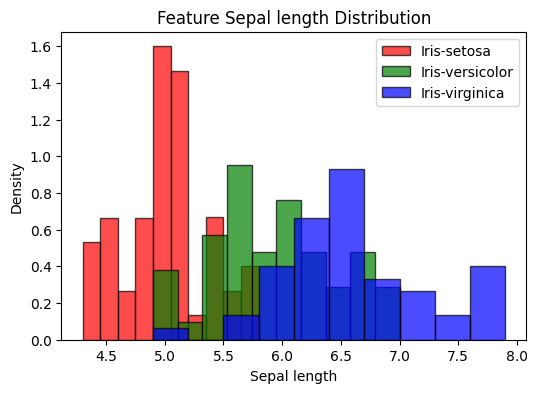

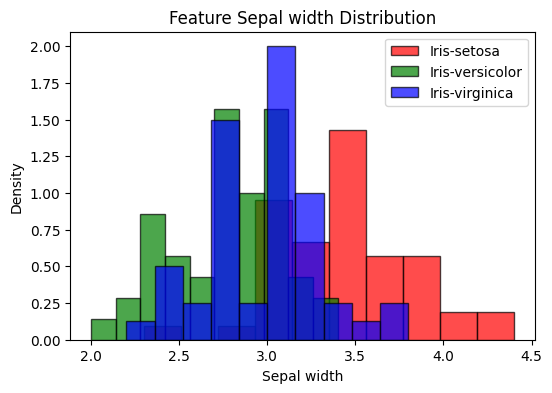

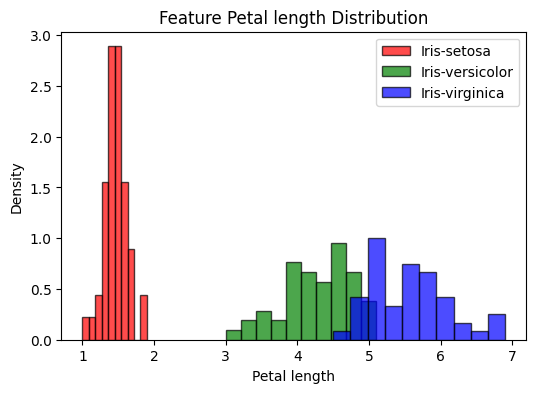

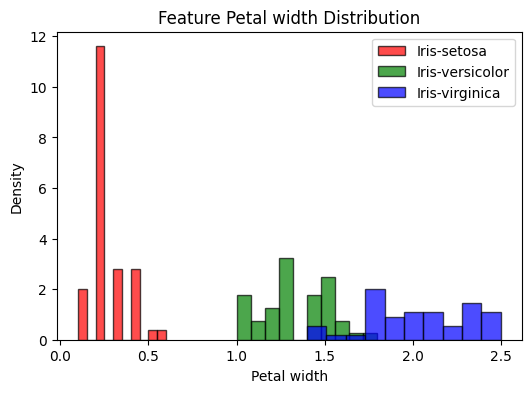

In [50]:

labelColors = {0: "red", 1: "green", 2: "blue"}
classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}
for i in range(numFeatures):
    plt.figure(figsize=(6,4))
    for label in labelColors:
        sample_with_that_class = x[i][ y == label]
        #print(sample_with_that_class)
        plt.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
        plt.legend()  # Mostra la legenda

    plt.title(f"Feature {featuresNames[i]} Distribution")
    plt.xlabel(featuresNames[i])
    plt.ylabel("Density")
    plt.show()

We can observe that there is large overlap for the first two features, whereas values for the third and
fourth features of iris-setosa are well separated from those of the other two flower families.

We now consider pairs of values and visualize the scatter plots of the different feature pairs for each class.

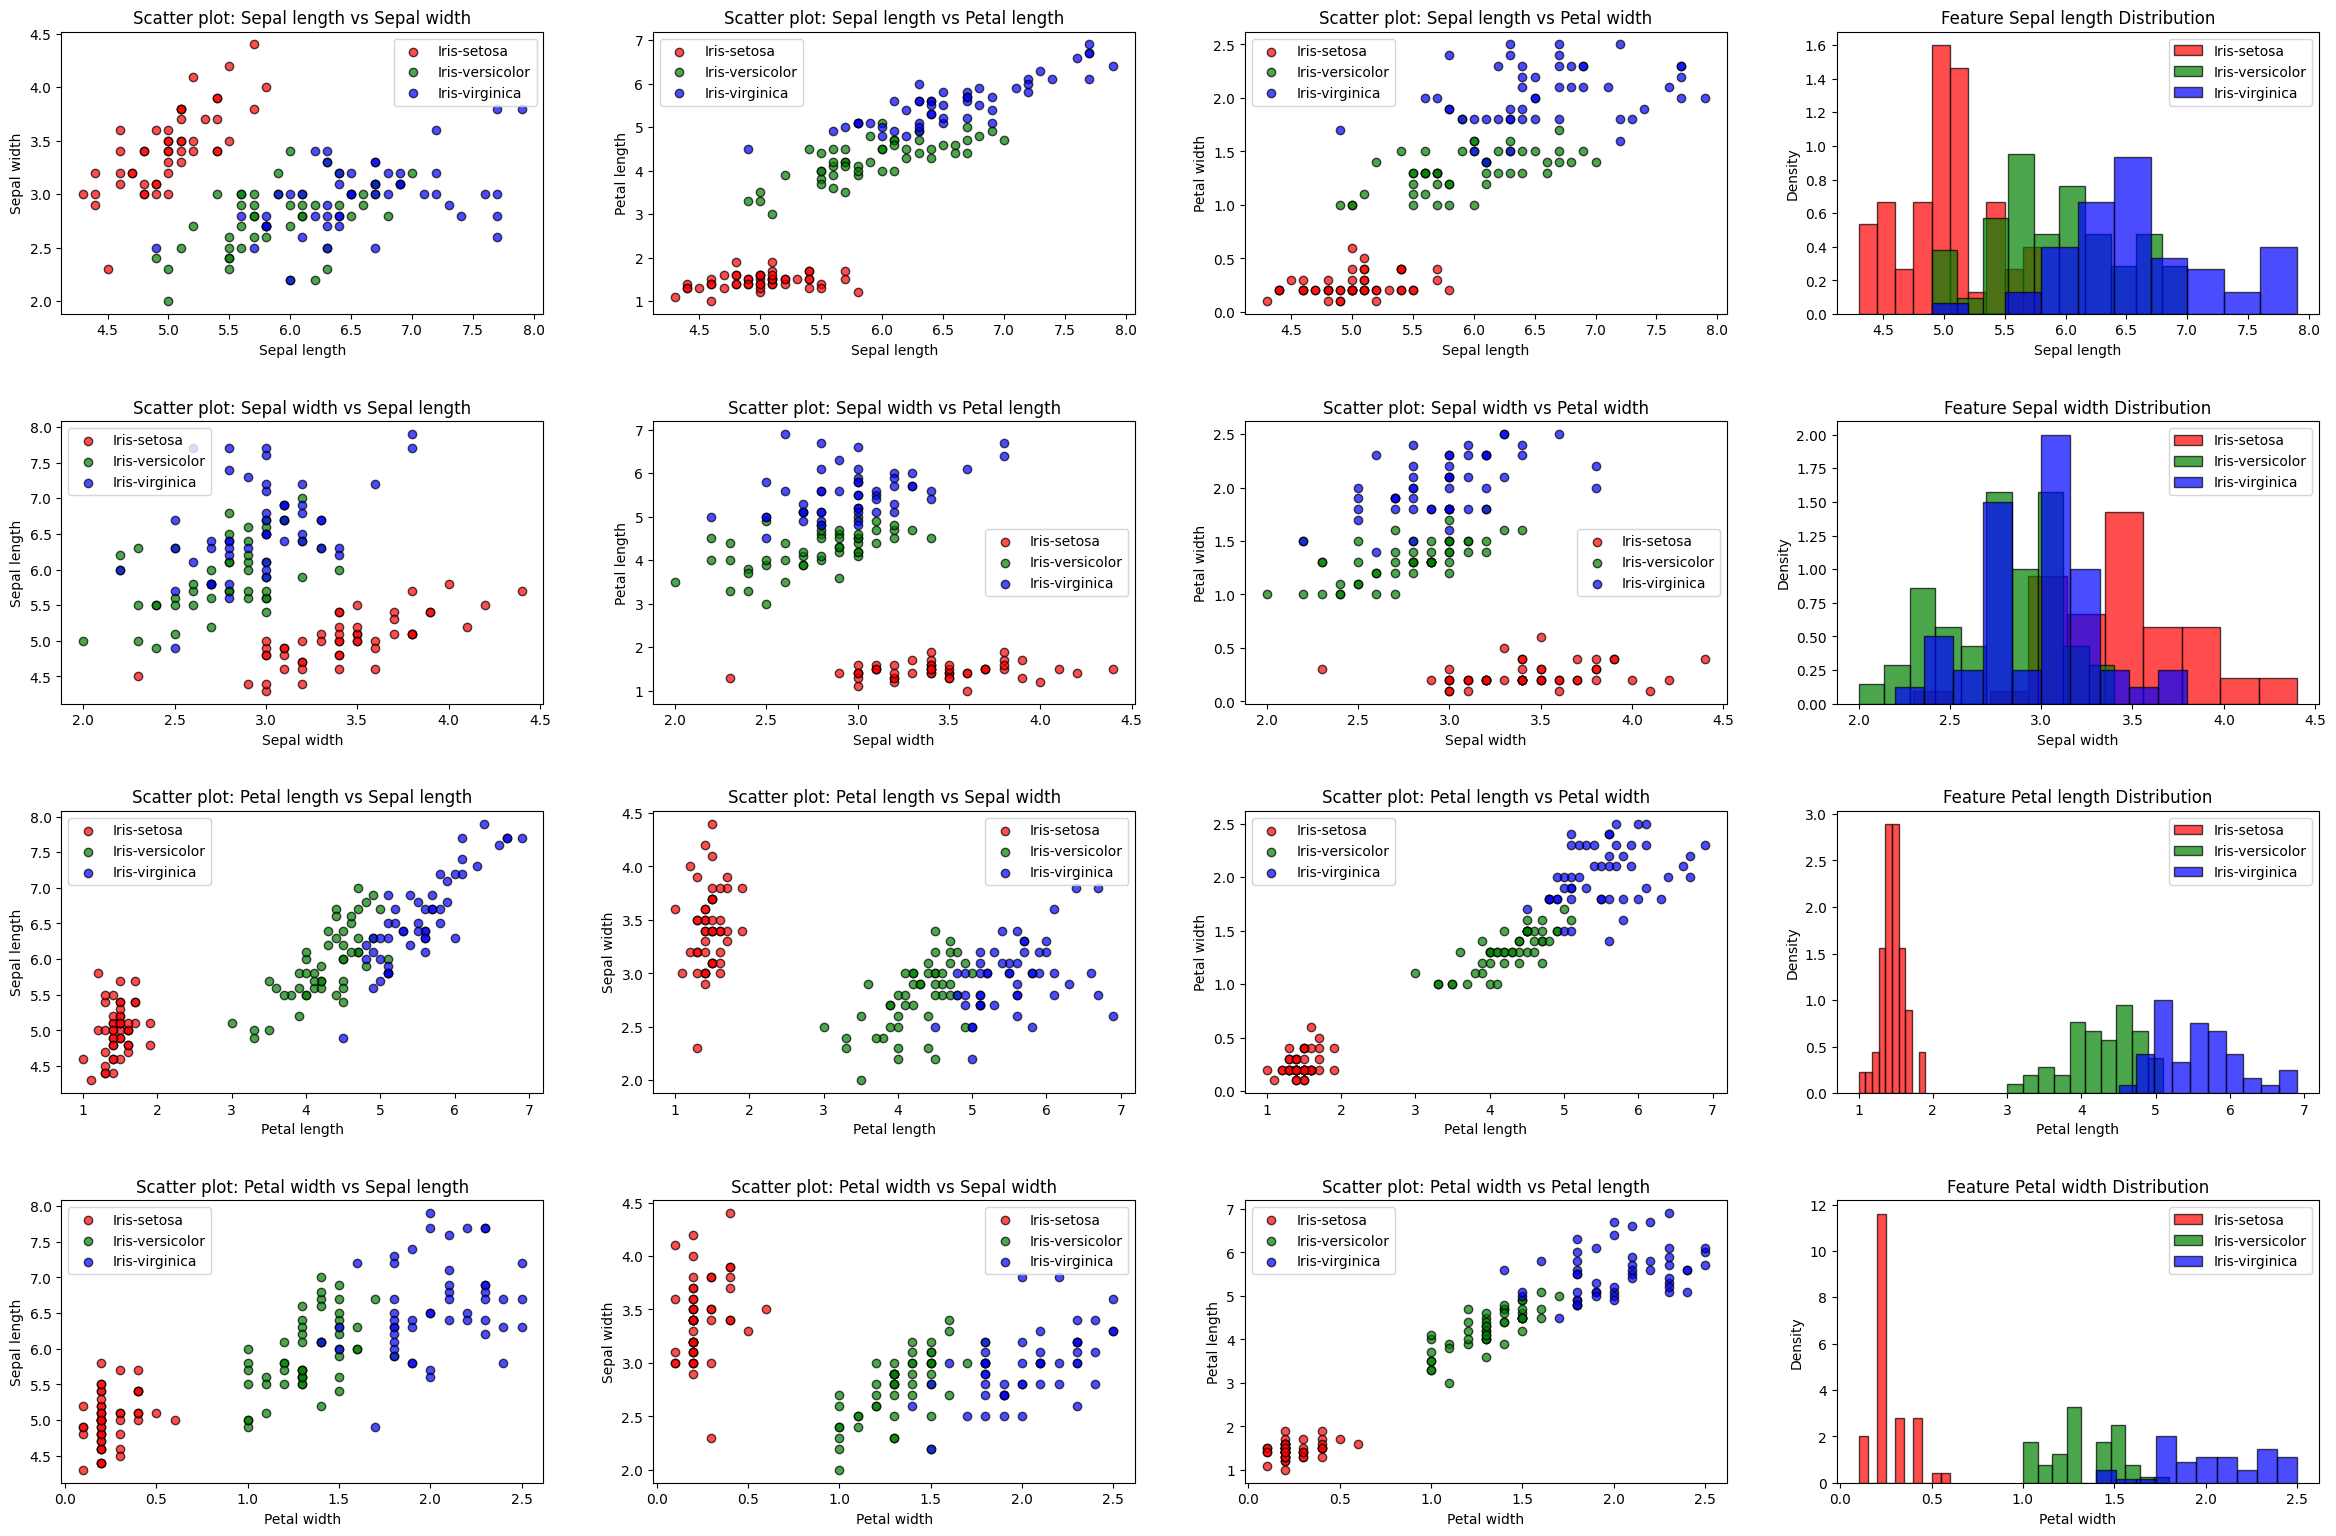

In [51]:
#I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

#rows, cols for making the subplot
cols = 4
rows = 4

#subplot creation
fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

subplotCounter = 0
for i in range(numFeatures):
    for j in range(numFeatures):
        if j == i: continue

        #choose the subplot
        subplot = plots[subplotCounter]
        subplotCounter+=1

        #plt.scatter accepts x and y vectors
        for label in labelColors:
            xFeature = x[i][ y == label]
            yFeature = x[j][ y == label]
            subplot.scatter(xFeature, yFeature, color= labelColors[label], alpha=0.7,  label=f"{classLabels[label]}", edgecolor="black")

        subplot.set_xlabel(featuresNames[i])
        subplot.set_ylabel(featuresNames[j])
        subplot.legend()
        subplot.set_title(f"Scatter plot: {featuresNames[i]} vs {featuresNames[j]}")

    subplot = plots[subplotCounter]
    subplotCounter+=1
    for label in labelColors:
        sample_with_that_class = x[i][ y == label]
        subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
        subplot.legend()
        subplot.set_title(f"Feature {featuresNames[i]} Distribution")
        subplot.set_xlabel(featuresNames[i])
        subplot.set_ylabel("Density")

plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
plt.show()

## Point 3: Statistics Computation

### Dataset Mean

In [54]:
D.shape

(4, 150)

The for loop is, in general, slow. Numpy allows
computing the mean of an array through the method .mean. The method allows specifying an axis —
for 2-D arrays, axis = 0 allows computing the mean over rows, whereas axis = 1 allows computing
the means over columns

In [55]:
mu = D.mean(axis=1) #over columns
mu

array([5.8433347, 3.0573332, 3.7580001, 1.1993335], dtype=float32)

In [56]:
mu.shape

(4,)

Pay attention to the shape of D.mean(1): it’s a 1-D array, thus we convert it to a column vector through
the .reshape method

In [57]:
mu = mu.reshape((mu.shape[0], 1))
mu

array([[5.8433347],
       [3.0573332],
       [3.7580001],
       [1.1993335]], dtype=float32)

In [58]:
mu.shape

(4, 1)

We now exploit broadcasting to **center the data**, i.e. to **remove the mean from all points**. Notice that we want the mean to be a column vector, so we first reshape it.

In [65]:
DC = D - mu #D centered, so with every element - mu
print(f"Before centering: {D[0][0:10]}\nAfter centering: {DC[0][0:10]}")

Before centering: [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9]
After centering: [-0.7433348  -0.9433346  -1.1433349  -1.2433348  -0.8433347  -0.44333458
 -1.2433348  -0.8433347  -1.4433346  -0.9433346 ]
